In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WineQT.csv to WineQT.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/WineQT.csv')

# Show first 5 rows
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [ ]:
print(df['quality'].value_counts())

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64


In [ ]:
df = df.drop('Id', axis=1)

df['quality_label'] = (df['quality'] >= 7).astype(int)

print(df['quality_label'].value_counts())

quality_label
0    984
1    159
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Just make sure these exist
print("Data shape:", df.shape)

Data shape: (1143, 13)


In [ ]:
import pandas as pd

try:
    df
except NameError:
    print("DataFrame not defined — re-upload and reload the CSV.")
else:
    print("DataFrame loaded successfully.")
    print(df.shape)

DataFrame loaded successfully.
(1143, 13)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WineQT.csv to WineQT (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv('/content/WineQT (1).csv')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [ ]:
df = df.drop('Id', axis=1)
df['quality_label'] = (df['quality'] >= 7).astype(int)
print(df['quality_label'].value_counts())

quality_label
0    984
1    159
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

# Split data (80% train, 20% test) with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Check class distribution in splits
print("Train class distribution:")
print(y_train.value_counts(normalize=True))
print("Test class distribution:")
print(y_test.value_counts(normalize=True))


Training set size: 914 samples
Test set size: 229 samples
Train class distribution:
quality_label
0    0.86105
1    0.13895
Name: proportion, dtype: float64
Test class distribution:
quality_label
0    0.860262
1    0.139738
Name: proportion, dtype: float64


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

print("✅ Model training complete!")

✅ Model training complete!


Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       197
           1       0.53      0.62      0.57        32

    accuracy                           0.87       229
   macro avg       0.73      0.77      0.75       229
weighted avg       0.88      0.87      0.87       229



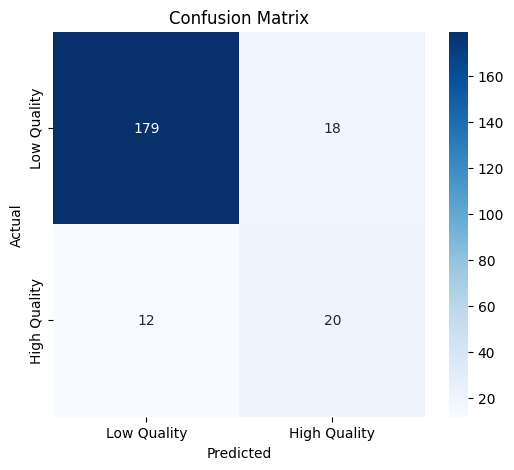

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = pipeline.predict(X_test)

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Quality', 'High Quality'],
            yticklabels=['Low Quality', 'High Quality'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'clf__max_depth': [3, 5, 10, 20, None],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

# Create pipeline again (for safety)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=42))
])

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='f1', verbose=2)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best params and score
print("Best parameters:", grid_search.best_params_)
print("Best F1 score (CV):", grid_search.best_score_)


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters: {'clf__max_depth': 20, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Best F1 score (CV): 0.5764577958858985


              precision    recall  f1-score   support

           0       0.94      0.91      0.92       197
           1       0.53      0.62      0.57        32

    accuracy                           0.87       229
   macro avg       0.73      0.77      0.75       229
weighted avg       0.88      0.87      0.87       229



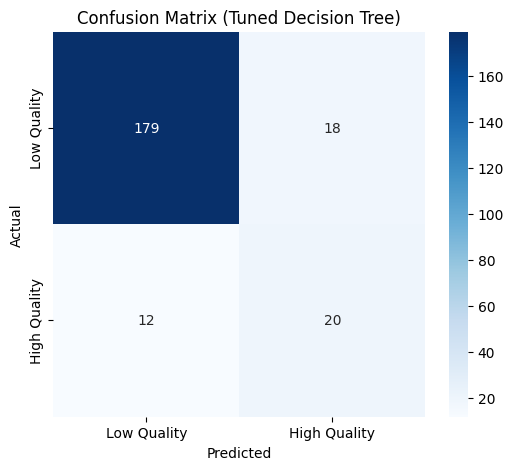

In [ ]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Quality', 'High Quality'],
            yticklabels=['Low Quality', 'High Quality'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Decision Tree)')
plt.show()


              precision    recall  f1-score   support

           0       0.94      0.97      0.96       197
           1       0.79      0.59      0.68        32

    accuracy                           0.92       229
   macro avg       0.86      0.78      0.82       229
weighted avg       0.92      0.92      0.92       229



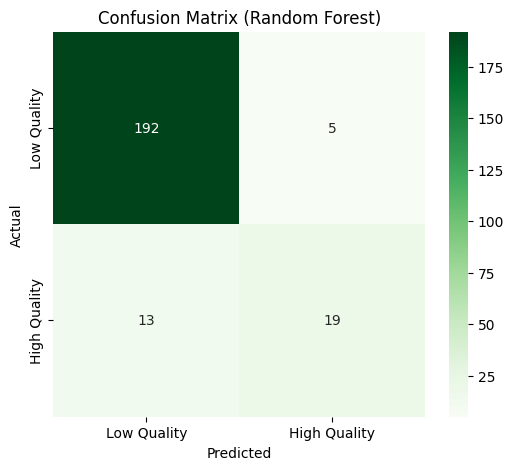

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Pipeline with scaler and random forest
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Train
rf_pipeline.fit(X_train, y_train)

# Predict
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred_rf))

# Confusion matrix plot
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Low Quality', 'High Quality'],
            yticklabels=['Low Quality', 'High Quality'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Parameter grid
param_grid_rf = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [10, 20, None],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2],
    'clf__class_weight': [None, 'balanced']
}

# Pipeline with RF
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Grid search
grid_search_rf = GridSearchCV(
    rf_pipeline,
    param_grid_rf,
    cv=5,
    n_jobs=-1,
    scoring='f1',
    verbose=2
)

# Fit on train data
grid_search_rf.fit(X_train, y_train)

# Best parameters and score
print("Best RF params:", grid_search_rf.best_params_)
print("Best RF F1 score (CV):", grid_search_rf.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best RF params: {'clf__class_weight': 'balanced', 'clf__max_depth': 20, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}
Best RF F1 score (CV): 0.6401033308790677


Classification Report (Tuned Random Forest):

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       197
           1       0.69      0.62      0.66        32

    accuracy                           0.91       229
   macro avg       0.81      0.79      0.80       229
weighted avg       0.91      0.91      0.91       229



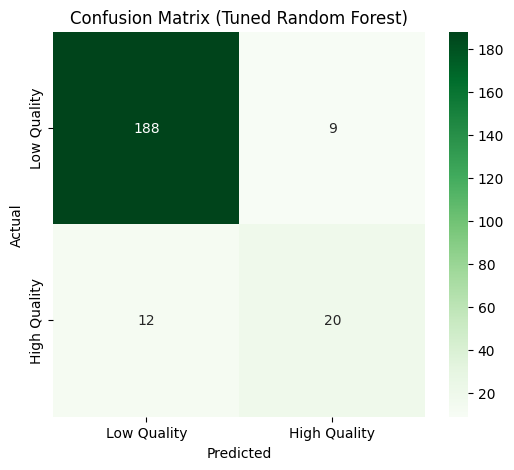

In [ ]:
# Get best model
best_rf_model = grid_search_rf.best_estimator_

# Predict on test set
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluation
print("Classification Report (Tuned Random Forest):\n")
print(classification_report(y_test, y_pred_best_rf))

# Confusion matrix
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Low Quality', 'High Quality'],
            yticklabels=['Low Quality', 'High Quality'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Random Forest)')
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:08:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report (XGBoost):

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       197
           1       0.60      0.66      0.63        32

    accuracy                           0.89       229
   macro avg       0.77      0.79      0.78       229
weighted avg       0.90      0.89      0.89       229



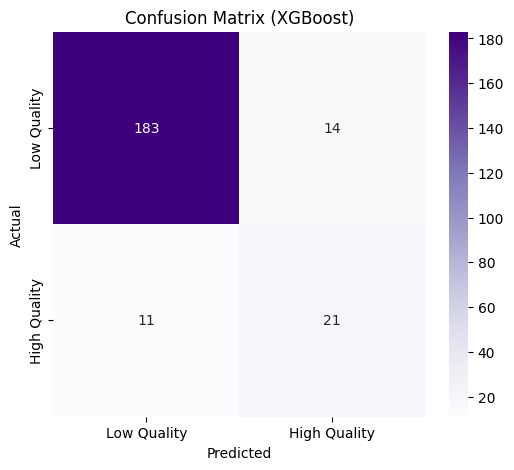

In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# XGBoost pipeline
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1,
        scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1])  # to handle imbalance
    ))
])

# Train the model
xgb_pipeline.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_pipeline.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Classification Report (XGBoost):\n")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Low Quality', 'High Quality'],
            yticklabels=['Low Quality', 'High Quality'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost)')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid_xgb = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [3, 5, 7],
    'clf__learning_rate': [0.01, 0.1, 0.2],
    'clf__subsample': [0.7, 1],
    'clf__colsample_bytree': [0.7, 1]
}

# Create pipeline
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1,
        scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1])
    ))
])

grid_search_xgb = GridSearchCV(
    xgb_pipeline,
    param_grid_xgb,
    cv=3,          # 3-fold for speed, increase to 5 if you want
    n_jobs=-1,
    scoring='f1',
    verbose=2
)

grid_search_xgb.fit(X_train, y_train)

print("Best XGB params:", grid_search_xgb.best_params_)
print("Best XGB F1 score (CV):", grid_search_xgb.best_score_)



Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best XGB params: {'clf__colsample_bytree': 0.7, 'clf__learning_rate': 0.2, 'clf__max_depth': 3, 'clf__n_estimators': 100, 'clf__subsample': 1}
Best XGB F1 score (CV): 0.6414900910380893


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:08:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report (Tuned XGBoost):

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       197
           1       0.54      0.59      0.57        32

    accuracy                           0.87       229
   macro avg       0.74      0.76      0.75       229
weighted avg       0.88      0.87      0.88       229



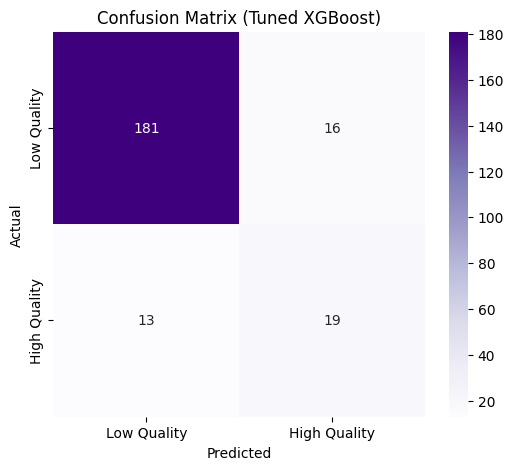

In [ ]:
# Get best estimator
best_xgb_model = grid_search_xgb.best_estimator_

# Predict on test set
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Classification Report (Tuned XGBoost):\n")
print(classification_report(y_test, y_pred_best_xgb))

# Confusion matrix
cm_best_xgb = confusion_matrix(y_test, y_pred_best_xgb)
plt.figure(figsize=(6,5))
sns.heatmap(cm_best_xgb, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Low Quality', 'High Quality'],
            yticklabels=['Low Quality', 'High Quality'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned XGBoost)')
plt.show()


Before SMOTE: Counter({0: 787, 1: 127})
After SMOTE: Counter({0: 787, 1: 787})
Classification Report (Random Forest + SMOTE):

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       197
           1       0.55      0.66      0.60        32

    accuracy                           0.88       229
   macro avg       0.75      0.78      0.76       229
weighted avg       0.89      0.88      0.88       229



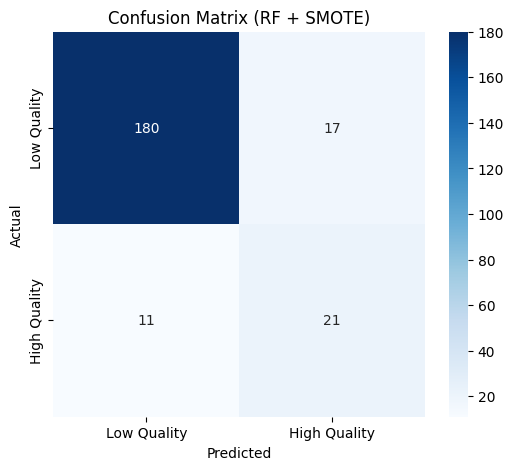

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only on training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check new class distribution
print('Before SMOTE:', Counter(y_train))
print('After SMOTE:', Counter(y_train_smote))

# Retrain Random Forest on SMOTE data
from sklearn.ensemble import RandomForestClassifier

rf_smote_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(
        random_state=42,
        n_estimators=200,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight=None  # class_weight not needed as data is balanced now
    ))
])

# Train
rf_smote_pipeline.fit(X_train_smote, y_train_smote)

# Predict on original test set
y_pred_smote = rf_smote_pipeline.predict(X_test)

# Evaluate
print("Classification Report (Random Forest + SMOTE):\n")
print(classification_report(y_test, y_pred_smote))

# Confusion matrix
cm_smote = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(6,5))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Quality', 'High Quality'],
            yticklabels=['Low Quality', 'High Quality'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (RF + SMOTE)')
plt.show()


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best RF params with SMOTE: {'clf__max_depth': 20, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}
Best RF F1 score (CV) with SMOTE: 0.9323731478441412

Classification Report (Tuned RF + SMOTE):

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       197
           1       0.57      0.66      0.61        32

    accuracy                           0.88       229
   macro avg       0.76      0.79      0.77       229
weighted avg       0.89      0.88      0.89       229



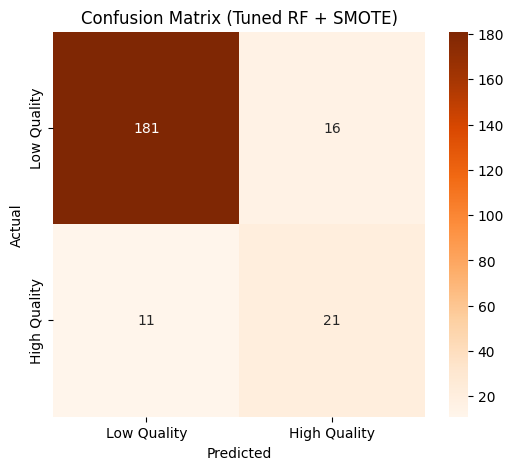

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Parameter grid (you can tweak this as needed)
param_grid_smote_rf = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [10, 20, None],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2]
}

# Pipeline (same as before, no class_weight because data is balanced)
rf_smote_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

grid_search_smote_rf = GridSearchCV(
    rf_smote_pipeline,
    param_grid_smote_rf,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Fit on SMOTE training data
grid_search_smote_rf.fit(X_train_smote, y_train_smote)

print("Best RF params with SMOTE:", grid_search_smote_rf.best_params_)
print("Best RF F1 score (CV) with SMOTE:", grid_search_smote_rf.best_score_)

# Evaluate best model on original test set
best_smote_rf = grid_search_smote_rf.best_estimator_
y_pred_smote_rf = best_smote_rf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("\nClassification Report (Tuned RF + SMOTE):\n")
print(classification_report(y_test, y_pred_smote_rf))

cm_smote_rf = confusion_matrix(y_test, y_pred_smote_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm_smote_rf, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Low Quality', 'High Quality'],
            yticklabels=['Low Quality', 'High Quality'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned RF + SMOTE)')
plt.show()



In [ ]:
import joblib

# Assuming best_smote_rf is your final pipeline model
joblib.dump(best_smote_rf, 'rf_smote_pipeline.pkl')

print("Model pipeline saved as 'rf_smote_pipeline.pkl'")


Model pipeline saved as 'rf_smote_pipeline.pkl'


In [ ]:
import joblib

loaded_model = joblib.load('rf_smote_pipeline.pkl')

# Now you can predict with loaded_model just like before
# e.g. loaded_model.predict(X_new)


In [ ]:
new_data = pd.DataFrame({
    'fixed acidity': [7.4, 6.7],
    'volatile acidity': [0.7, 0.6],
    'citric acid': [0.0, 0.1],
    'residual sugar': [1.9, 2.0],
    'chlorides': [0.076, 0.070],
    'free sulfur dioxide': [11.0, 15.0],
    'total sulfur dioxide': [34.0, 40.0],
    'density': [0.9978, 0.9980],
    'pH': [3.51, 3.40],
    'sulphates': [0.56, 0.60],
    'alcohol': [9.4, 10.0]
})

# Predict class labels
predictions = loaded_model.predict(new_data)
print("Predictions:", predictions)

# Predict probabilities for class 1 (high quality)
probabilities = loaded_model.predict_proba(new_data)[:, 1]
print("Predicted probabilities for high quality:", probabilities)

Predictions: [0 0]
Predicted probabilities for high quality: [0.         0.01333333]


In [ ]:
import pandas as pd

high_quality_samples = pd.DataFrame({
    'fixed acidity': [7.8, 8.5, 7.5, 8.0, 7.9],
    'volatile acidity': [0.25, 0.22, 0.20, 0.30, 0.28],  # lower is better
    'citric acid': [0.55, 0.60, 0.58, 0.65, 0.62],
    'residual sugar': [2.0, 2.5, 2.1, 2.2, 2.3],
    'chlorides': [0.04, 0.045, 0.05, 0.038, 0.042],
    'free sulfur dioxide': [14, 16, 15, 17, 18],
    'total sulfur dioxide': [40, 45, 42, 44, 43],
    'density': [0.995, 0.994, 0.996, 0.993, 0.995],
    'pH': [3.20, 3.25, 3.30, 3.18, 3.22],
    'sulphates': [0.70, 0.75, 0.72, 0.78, 0.74],  # higher is better
    'alcohol': [11.5, 12.0, 11.8, 12.5, 12.3]     # higher alcohol content
})

predictions = loaded_model.predict(high_quality_samples)
probabilities = loaded_model.predict_proba(high_quality_samples)[:, 1]

print("Predictions:", predictions)
print("Probabilities for high quality:", probabilities)


Predictions: [1 1 1 1 1]
Probabilities for high quality: [0.66931548 0.623875   0.62258333 0.56461905 0.64929167]


In [ ]:
# Define features and labels (in case X and y are not in memory)
import pandas as pd

X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Random Forest pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(
        random_state=42,
        n_estimators=200,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=2,
        n_jobs=-1
    ))
])

# 5-fold Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation with F1 score
cv_scores = cross_val_score(rf_pipeline, X, y, cv=cv, scoring='f1')

print("Cross-validation F1 scores:", cv_scores)
print("Mean CV F1:", np.mean(cv_scores))
print("Std CV F1:", np.std(cv_scores))



Cross-validation F1 scores: [0.42622951 0.6        0.68       0.48148148 0.48979592]
Mean CV F1: 0.5355013816091099
Std CV F1: 0.0916377692768718


NameError: name 'cv_scores_smote' is not defined

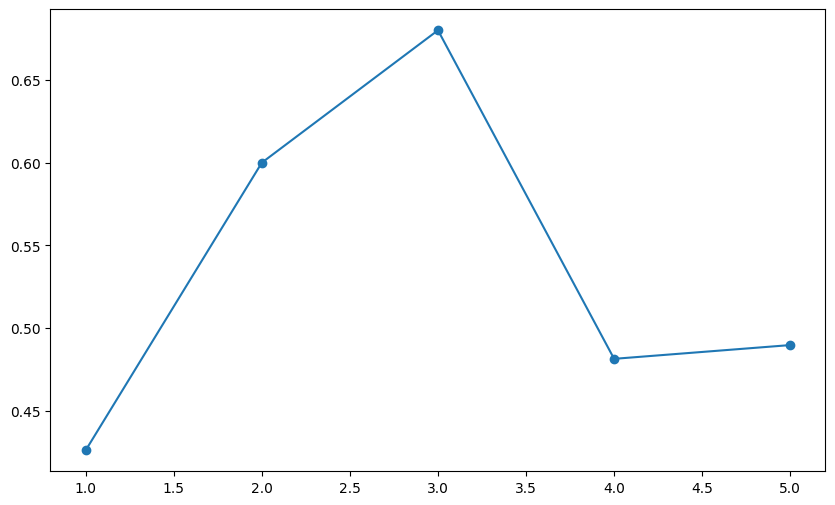

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume you already have:
# cv_scores      -> cross-validation F1 scores without SMOTE
# cv_scores_smote -> cross-validation F1 scores with SMOTE

# Number of folds
folds = np.arange(1, len(cv_scores) + 1)

plt.figure(figsize=(10,6))

# Plot per-fold scores
plt.plot(folds, cv_scores, marker='o', label='Random Forest (No SMOTE)')
plt.plot(folds, cv_scores_smote, marker='s', label='Random Forest + SMOTE')

# Plot mean lines
plt.axhline(np.mean(cv_scores), color='blue', linestyle='--', alpha=0.7,
            label=f'Mean F1 (No SMOTE): {np.mean(cv_scores):.3f}')
plt.axhline(np.mean(cv_scores_smote), color='orange', linestyle='--', alpha=0.7,
            label=f'Mean F1 (SMOTE): {np.mean(cv_scores_smote):.3f}')

plt.title('Cross-Validation F1 Score Comparison')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.xticks(folds)
plt.ylim(0, 1)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Pipeline with SMOTE + Random Forest
smote_rf_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(
        random_state=42,
        n_estimators=200,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=2,
        n_jobs=-1
    ))
])

# 5-fold Stratified CV (same as before)
cv_scores_smote = cross_val_score(smote_rf_pipeline, X, y, cv=cv, scoring='f1')

print("CV F1 scores with SMOTE:", cv_scores_smote)
print("Mean CV F1 (SMOTE):", np.mean(cv_scores_smote))


CV F1 scores with SMOTE: [0.55263158 0.65753425 0.75362319 0.65853659 0.59701493]
Mean CV F1 (SMOTE): 0.6438681049334992


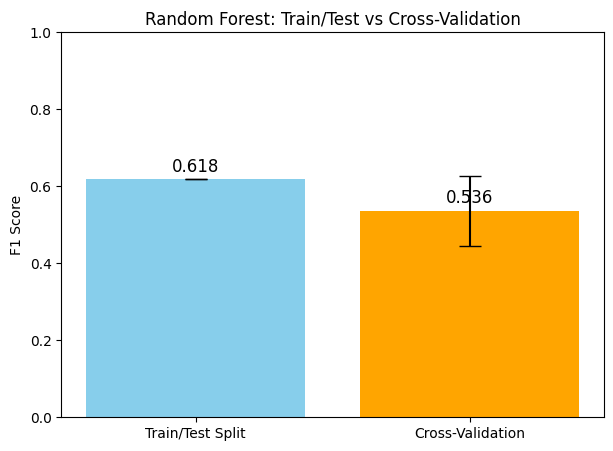

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Single train/test evaluation (already computed earlier in your notebook)
# Example: if you stored the F1 score from test set evaluation
from sklearn.metrics import f1_score

# Recompute F1 on the original test split if needed:
y_pred_rf = rf_pipeline.fit(X_train, y_train).predict(X_test)
f1_test = f1_score(y_test, y_pred_rf)

# Cross-validation results (from before)
cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

# Plot comparison
labels = ['Train/Test Split', 'Cross-Validation']
scores = [f1_test, cv_mean]

plt.figure(figsize=(7,5))
bars = plt.bar(labels, scores, yerr=[0, cv_std], capsize=8, color=['skyblue', 'orange'])

# Add score labels on top
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f"{score:.3f}", ha='center', fontsize=12)

plt.ylim(0, 1)
plt.ylabel('F1 Score')
plt.title('Random Forest: Train/Test vs Cross-Validation')
plt.show()


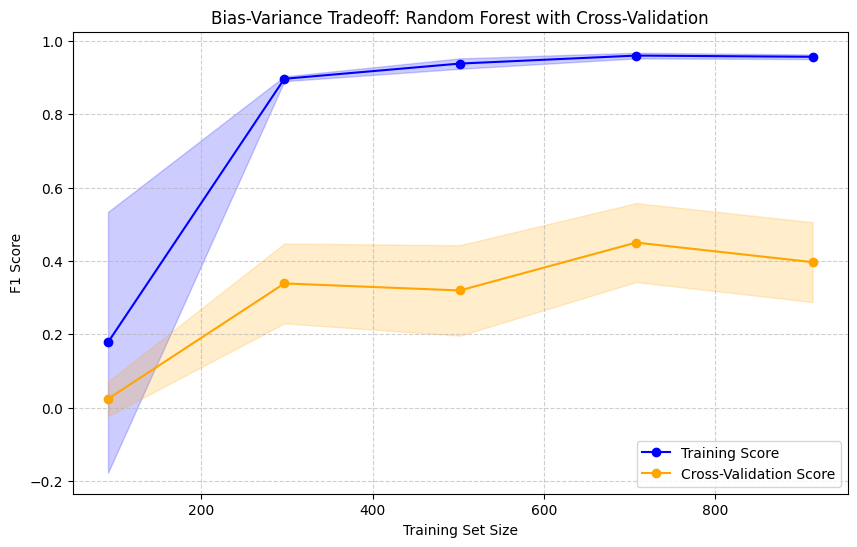

In [ ]:
from sklearn.model_selection import learning_curve

# Use the same Random Forest pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(
        random_state=42,
        n_estimators=200,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=2,
        n_jobs=-1
    ))
])

# Learning curve with cross-validation
train_sizes, train_scores, val_scores = learning_curve(
    rf_pipeline, X, y, cv=5, scoring='f1', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
)

# Mean and std
train_mean, train_std = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
val_mean, val_std = np.mean(val_scores, axis=1), np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, val_mean, 'o-', color='orange', label='Cross-Validation Score')

# Shaded areas = variance
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, color='orange', alpha=0.2)

plt.title('Bias-Variance Tradeoff: Random Forest with Cross-Validation')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
